In [1]:
library(Seurat)
library(SignacX)
source("/fast/AG_Haghverdi/Carla_Moelbert/Celltype_annotation/Scripts/functions.R")

Attaching SeuratObject



In [2]:
q <- "/fast/AG_Haghverdi/Carla_Moelbert/Celltype_annotation/Data/Fulldata/PBMC_Query/data.csv"
counts <- as.data.frame(readData(q))    
q<-  CreateSeuratObject(counts = counts) 
q <- SCTransform(q)
q<- RunPCA(q, verbose = FALSE)
q <- RunUMAP(q, dims = 1:30, verbose = FALSE)
q <- FindNeighbors(q, dims = 1:30, verbose = FALSE)
pred <- Signac(E = q)
celltypes = GenerateLabels(pred, E = q)


Warning message in data.table::fread(data, sep = ",", verbose = F):
“Detected 10910 column names but the data has 10911 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”
Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 20054 by 10910

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 72 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 20054 genes



  |======================================================================| 100%


Computing corrected count matrix for 20054 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 3.730894 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


 ..........  Entry in Signac 
 ..........  Running Signac on Seurat object :
             nrow = 20054
             ncol = 10910

 ..........  Exit Signac.
             Execution time = 1526.544 s.
             Signac found 7 novel celltypes!


In [3]:
labels = c("Cytotoxic T cell", "CD4+ T cell", "CD14+ monocyte", "B cell", "Megakaryocyte",
              "Natural killer cell", "CD16+ monocyte", "Dendritic cell", "Plasmacytoid dendritic cell")


#"B cell" <- B.memory, B.naive
#"Megakaryocyte" ?
#"Plasmacytoid dendritic cell" <- Plasma.cells

table(as.character(celltypes$L18))


        B.memory          B.naive               DC    Mon.Classical 
            1039             1633              182             1705 
Mon.NonClassical               NK     Plasma.cells     T.CD4.memory 
             340              890               21              400 
     T.CD4.naive         T.CD8.cm         T.CD8.em      T.CD8.naive 
            2162              161             2113              223 
          T.regs 
              41 

In [4]:
meta <- read.csv("/fast/AG_Haghverdi/Carla_Moelbert/Celltype_annotation/Data/Fulldata/PBMC_Query/meta.csv")


meta <- meta[meta$id %in% colnames(counts),]
ct <- as.character(celltypes$L18)

ct[ct %in% c("T.CD8.cm", "T.CD8.em", "T.CD8.naive")] <- "Cytotoxic T cell"
ct[ct %in% c("T.CD4.memory.regs", "T.CD4.naive", "T.CD4.memory" )] <- "CD4+ T cell"
ct[ct %in% c("Mon.Classical")] <- "CD14+ monocyte"
ct[ct %in% c("NK")] <-"Natural killer cell"
ct[ct %in% c("DC")] <-"Dendritic cell"
ct[ct %in% c("Mon.NonClassical")] <-"CD16+ monocyte"
ct[ct %in% c("B.memory", "B.naive")] <-"B cell"
ct[ct %in% c("Plasma.cells")] <-"Plasmacytoid dendritic cell"
meta$predicted <- ct
head(meta, 20)

,id,nGene,nUMI,percent.mito,Cluster,class_,Experiment,Method,predicted
,<chr>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
274,pbmc2_Celseq2_1_ACGTAC,3232,7545,0.1186216,1,Cytotoxic T cell,pbmc2,CEL-Seq2,Cytotoxic T cell
275,pbmc2_Celseq2_1_ACTCTG,2329,5062,0.1363098,0,CD4+ T cell,pbmc2,CEL-Seq2,Cytotoxic T cell
276,pbmc2_Celseq2_1_AGACCA,2209,4711,0.1454044,0,CD4+ T cell,pbmc2,CEL-Seq2,Cytotoxic T cell
277,pbmc2_Celseq2_1_AGGACA,2460,5211,0.1387450,3,Natural killer cell,pbmc2,CEL-Seq2,Natural killer cell
278,pbmc2_Celseq2_1_AGTGTC,2808,6062,0.1318047,3,Natural killer cell,pbmc2,CEL-Seq2,Natural killer cell
279,pbmc2_Celseq2_1_CAACTC,2747,6001,0.1188135,3,Natural killer cell,pbmc2,CEL-Seq2,Natural killer cell
280,pbmc2_Celseq2_1_CACTCA,2297,5697,0.1707916,1,Cytotoxic T cell,pbmc2,CEL-Seq2,Cytotoxic T cell
281,pbmc2_Celseq2_1_CATGTC,2465,5989,0.1471030,1,Cytotoxic T cell,pbmc2,CEL-Seq2,Cytotoxic T cell
282,pbmc2_Celseq2_1_CTAGTG,1832,3908,0.1629990,1,Cytotoxic T cell,pbmc2,CEL-Seq2,Cytotoxic T cell


In [5]:
get_measures <- function(data, type){
    
    tp <- length(data$predicted[data$predicted == type & data$class_ == type])
    fp <- length(data$predicted[data$predicted == type & data$class_ != type])
    fn <- length(data$predicted[data$predicted != type & data$class_ == type])
    tn <- length(data$predicted[data$predicted != type & data$class_ != type])
    print(paste(type,tp,fp,fn, tn))
    precision <- tp / (tp + fp)
    recall <- tp / (tp + fn)
    f1 <- 2*(precision * recall) / (precision + recall)
    accuracy <- (tp) / length(data$predicted[data$class_ == type])
   
    return(data.frame("class"=type, "precision"=precision,"recall"=recall,"f1"=f1, "accuracy"=accuracy))
}
unique(meta$predicted)
unique(meta$class_)
measures <- do.call(rbind, lapply(unique(meta$class_), function(type) get_measures(meta, type)))
head(measures)

[1] "Cytotoxic T cell"            "Natural killer cell"        
[3] "CD4+ T cell"                 "B cell"                     
[5] "T.regs"                      "Plasmacytoid dendritic cell"
[7] "CD16+ monocyte"              "CD14+ monocyte"             
[9] "Dendritic cell"

[1] "Cytotoxic T cell"            "CD4+ T cell"                
[3] "Natural killer cell"         "CD14+ monocyte"             
[5] "B cell"                      "Dendritic cell"             
[7] "Megakaryocyte"               "CD16+ monocyte"             
[9] "Plasmacytoid dendritic cell"

[1] "Cytotoxic T cell 2021 476 246 8167"
[1] "CD4+ T cell 2457 105 501 7847"
[1] "Natural killer cell 674 216 23 9997"
[1] "CD14+ monocyte 1534 171 193 9012"
[1] "B cell 2611 61 56 8182"
[1] "Dendritic cell 79 103 145 10583"
[1] "Megakaryocyte 0 0 73 10837"
[1] "CD16+ monocyte 223 117 12 10558"
[1] "Plasmacytoid dendritic cell 1 20 61 10828"


,class,precision,recall,f1,accuracy
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Cytotoxic T cell,0.8093712,0.8914865,0.8484467,0.8914865
2,CD4+ T cell,0.9590164,0.8306288,0.8902174,0.8306288
3,Natural killer cell,0.7573034,0.9670014,0.8494014,0.9670014
4,CD14+ monocyte,0.8997067,0.8882455,0.8939394,0.8882455
5,B cell,0.9771707,0.9790026,0.9780858,0.9790026
6,Dendritic cell,0.4340659,0.3526786,0.3891626,0.3526786


In [6]:
measures[order(measures$class), c("class", "f1", "accuracy", "precision")]

,class,f1,accuracy,precision
,<chr>,<dbl>,<dbl>,<dbl>
5,B cell,0.97808578,0.97900262,0.97717066
4,CD14+ monocyte,0.89393939,0.88824551,0.89970674
8,CD16+ monocyte,0.77565217,0.94893617,0.65588235
2,CD4+ T cell,0.89021739,0.83062880,0.95901639
1,Cytotoxic T cell,0.84844668,0.89148655,0.80937125
6,Dendritic cell,0.38916256,0.35267857,0.43406593
7,Megakaryocyte,NaN,0.00000000,NaN
3,Natural killer cell,0.84940139,0.96700143,0.75730337
9,Plasmacytoid dendritic cell,0.02409639,0.01612903,0.04761905


In [7]:
full <- read.csv("../Results/Files/values_full.csv")
full <- full[,c("class", "reference", "method", "precision", "recall", "f1", "accuracy")]
head(full)

,class,reference,method,precision,recall,f1,accuracy
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Cytotoxic T cell,PBMC10x,CellID,0.8437500,0.0230473752,0.0448691317,0.0230473752
2,Cytotoxic T cell,PBMC10x,Seurat,0.7180877,0.6218523261,0.6665141812,0.6218523261
3,Cytotoxic T cell,PBMC10x,SingleCellNet,0.8541667,0.5074690568,0.6366800535,0.5074690568
4,Cytotoxic T cell,PBMC10x,SingleR,0.9582837,0.3431498079,0.5053425519,0.3431498079
5,Cytotoxic T cell,PBMC10x,ItClust,0.2114125,0.0964575331,0.1324736225,0.0964575331
6,CD4+ T cell,PBMC10x,CellID,1.0000000,0.0003320053,0.0006637902,0.0003320053



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite

Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


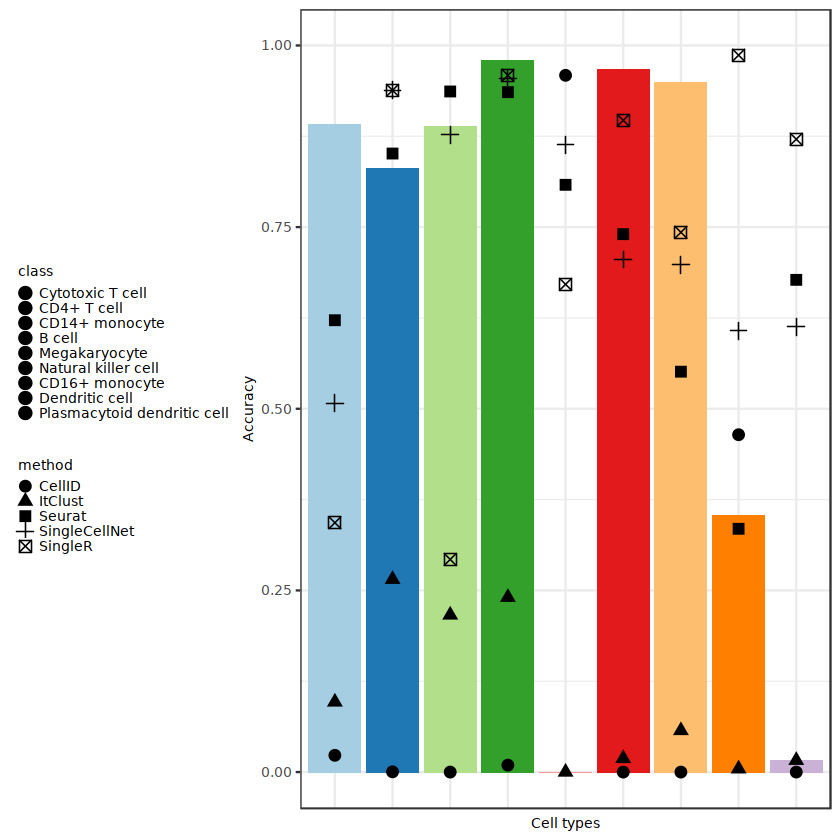

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


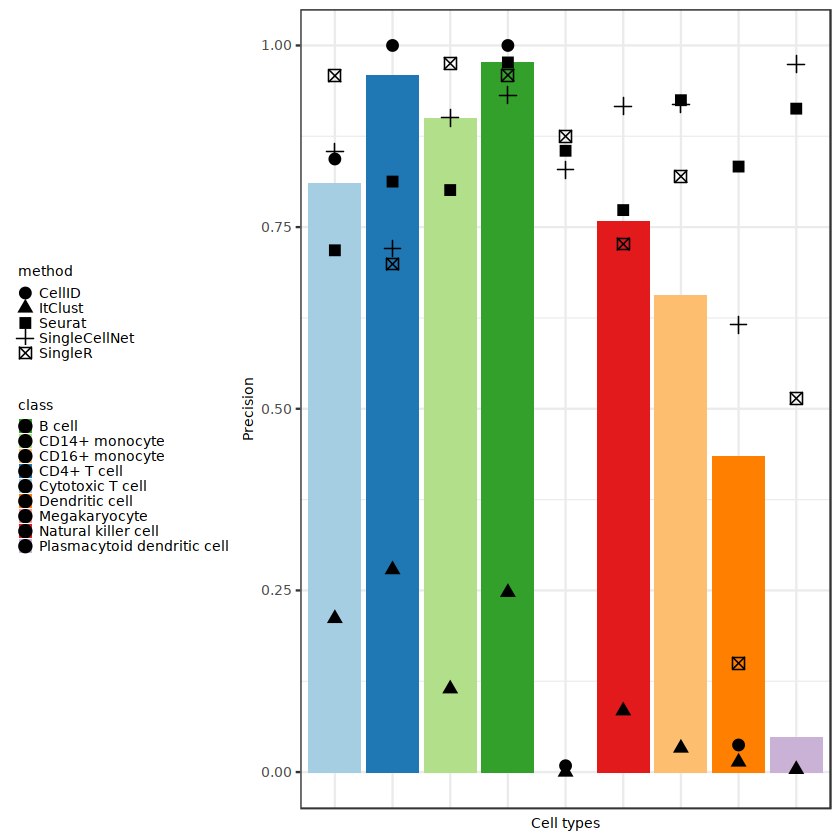

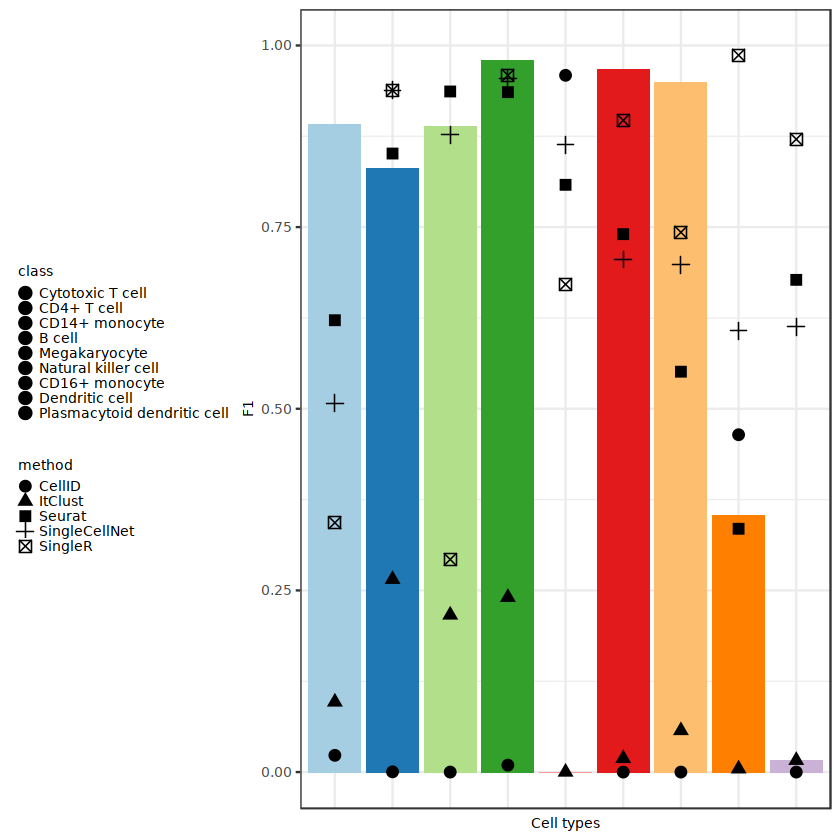

In [8]:
source("../Scripts/functions.R")
source("../Scripts/visulizations.r")
library(ggplot2)
library(dplyr)
library(purrr)
library(Seurat)
library(viridis)
library("RColorBrewer")

celltypes = c("Cytotoxic T cell", "CD4+ T cell", "CD14+ monocyte", "B cell",
              "Megakaryocyte", "Natural killer cell",
              "CD16+ monocyte", "Dendritic cell", "Plasmacytoid dendritic cell")

colors <-brewer.pal(length(celltypes), "Paired")
names(colors) <- celltypes
measures$class <- factor(measures$class, levels=celltypes)

a <- ggplot(measures, aes(class, accuracy, fill=class))+geom_bar(stat="identity", show.legend = F) + 
geom_point(data=full, aes(class, accuracy, shape=method), size=3) 
a <- addFormatting(a, "Accuracy", "Cell types",legend="left", xtext = "none",celltypes = colors, ylim=c(0,1))
a

p <- ggplot(measures, aes(class, precision, fill=class))+geom_bar(stat="identity")  + 
geom_point(data=full, aes(class, precision, shape=method), size=3) 
p <- addFormatting(p, "Precision", "Cell types",legend="left", xtext = "none",celltypes = colors, ylim=c(0,1))
p

f <- ggplot(measures, aes(class, f1, fill=class))+geom_bar(stat="identity")+ 
geom_point(data=full, aes(class, f1, shape=method), size=3)   
f <- addFormatting(a, "F1", "Cell types",legend="left", xtext = "none",celltypes = colors, ylim=c(0,1))
f



In [25]:
measures$method <-"SignacX"
full$reference <- NULL

data <- rbind(measures, full)
data$class <- factor(data$class, levels=celltypes)
methods <- c("SignacX","Seurat",  "SingleR","CellID", "SingleCellNet", "ItClust")

data$method <- factor(data$method, levels=methods)
head(data)

,class,precision,recall,f1,accuracy,method
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Cytotoxic T cell,0.8093712,0.8914865,0.8484467,0.8914865,SignacX
2,CD4+ T cell,0.9590164,0.8306288,0.8902174,0.8306288,SignacX
3,Natural killer cell,0.7573034,0.9670014,0.8494014,0.9670014,SignacX
4,CD14+ monocyte,0.8997067,0.8882455,0.8939394,0.8882455,SignacX
5,B cell,0.9771707,0.9790026,0.9780858,0.9790026,SignacX
6,Dendritic cell,0.4340659,0.3526786,0.3891626,0.3526786,SignacX


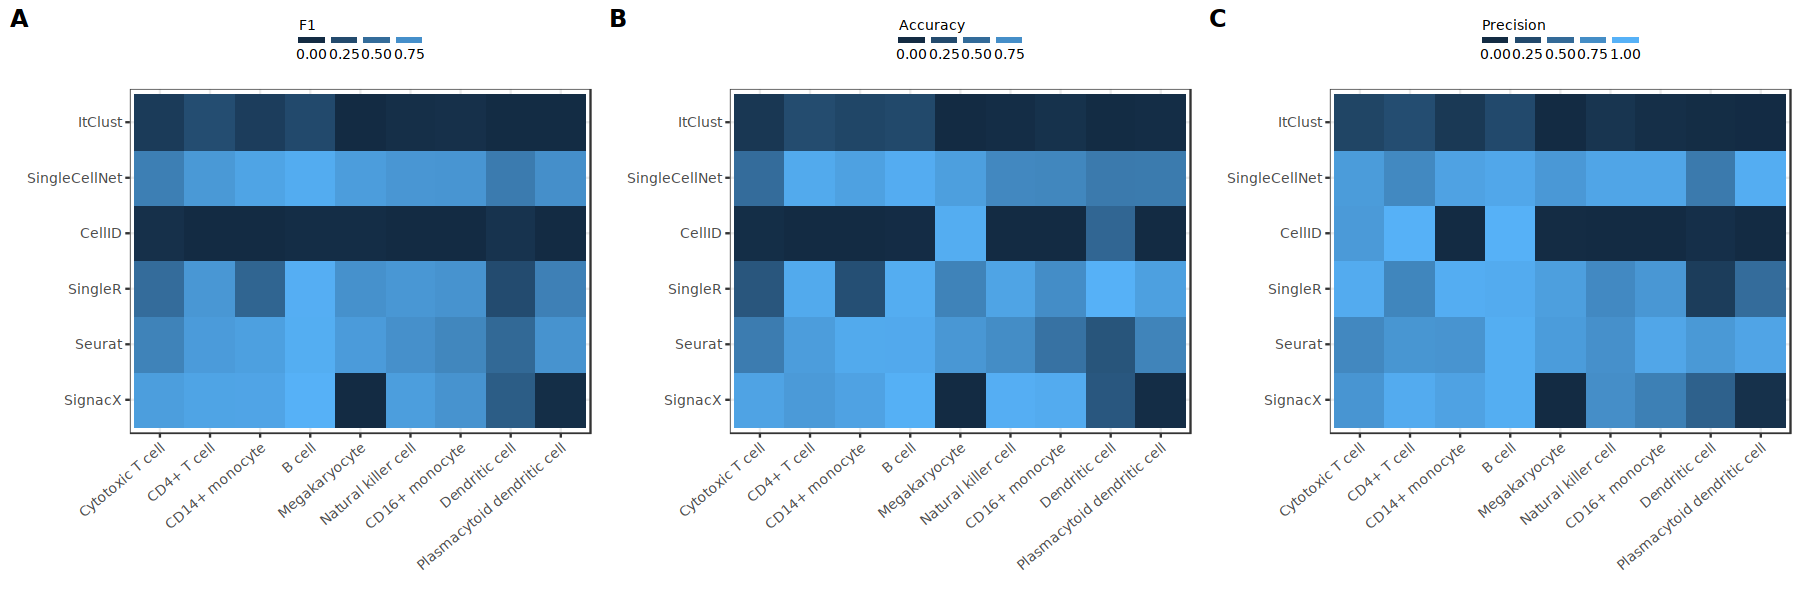

In [70]:
data$f1[is.na(data$f1)]<- 0
data$precision[is.na(data$precision)]<- 0

a <- ggplot(data, aes(class, method, fill=accuracy))+geom_tile() + theme_bw()+
     theme(legend.position = "top", legend.text=element_text(size = 8),
          legend.title=element_text(size = 8), legend.key.size = unit(3, 'point'),
          axis.text=element_text(size = 8), axis.title=element_text(size = 8),
          strip.text = element_text(size = 8), axis.text.x=element_text(angle = 40, vjust =1, hjust=1))+
     labs(x="", y="", fill ="Accuracy")+ 
guides(fill=guide_legend(title.position = "top", label.position = "bottom"))

p <- ggplot(data, aes(class, method, fill=precision))+geom_tile() + theme_bw()+
     theme(legend.position = "top", legend.text=element_text(size = 8),
          legend.title=element_text(size = 8),  legend.key.size = unit(3, 'point'),
          axis.text=element_text(size = 8), axis.title=element_text(size = 8),
          strip.text = element_text(size = 8), axis.text.x=element_text(angle = 40, vjust =1, hjust=1))+
     labs(x="", y="", fill ="Precision")+ 
guides(fill=guide_legend(title.position = "top", label.position = "bottom"))

f <- ggplot(data, aes(class, method, fill=f1))+geom_tile() + theme_bw()+
     theme(legend.position = "top", legend.text=element_text(size = 8),
          legend.title=element_text(size = 8),  legend.key.size = unit(3, 'point'),
          axis.text=element_text(size = 8), axis.title=element_text(size = 8),
          strip.text = element_text(size = 8), axis.text.x=element_text(angle = 40, vjust =1, hjust=1))+
     labs(x="", y="", fill ="F1")+ 
guides(fill=guide_legend(title.position = "top", label.position = "bottom"))

options(repr.plot.width=15, repr.plot.height=5) 
plot <- ggpubr::ggarrange(f,a,p,  nrow=1, ncol=3, common.legend=F,labels = c("A","B","C"))
plot
ggsave(
  "../Results/Figures/S10_Signacx.jpg",
  plot = plot,
  device = "jpg",
  path = NULL,
  scale = 1,
  width = 180,
  height = 80,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = "white"
)